In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns 

from google.colab import drive
drive.mount('/content/drive')
#read dataset
data = pd.read_csv("/country_vaccinations.csv")
print(data)




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
          country  ...                                     source_website
0     Afghanistan  ...  http://www.xinhuanet.com/english/asiapacific/2...
1     Afghanistan  ...  http://www.xinhuanet.com/english/asiapacific/2...
2     Afghanistan  ...  http://www.xinhuanet.com/english/asiapacific/2...
3     Afghanistan  ...  http://www.xinhuanet.com/english/asiapacific/2...
4     Afghanistan  ...  http://www.xinhuanet.com/english/asiapacific/2...
...           ...  ...                                                ...
7332     Zimbabwe  ...  https://twitter.com/MoHCCZim/status/1373023610...
7333     Zimbabwe  ...  https://twitter.com/MoHCCZim/status/1373023610...
7334     Zimbabwe  ...  https://twitter.com/MoHCCZim/status/1373023610...
7335     Zimbabwe  ...  https://twitter.com/MoHCCZim/status/1373023610...
7336     Zimbabwe  ...  https://twitter.com/MoHCCZim/stat

In [27]:
# Clean the dataset of null and/or unwanted columns
# Delete useless columns
#data.drop(columns = ["iso_code","source_name","source_website"]).reset_index()
# delete those duplicated rows 
data.duplicated()
data.drop_duplicates()
# delete those rows is null in key columns
data.isnull()
data.dropna()


,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
62,Albania,ALB,2021-02-18,3049.0,2438.0,611.0,1348.0,254.0,0.11,0.08,0.02,88.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
260,Argentina,ARG,2021-01-21,265724.0,249372.0,16352.0,17791.0,11704.0,0.59,0.55,0.04,259.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V",Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
261,Argentina,ARG,2021-01-22,279602.0,254456.0,25146.0,13878.0,11263.0,0.62,0.56,0.06,249.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V",Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
262,Argentina,ARG,2021-01-23,288064.0,258876.0,29188.0,8462.0,11124.0,0.64,0.57,0.06,246.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V",Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
263,Argentina,ARG,2021-01-24,292023.0,260036.0,31987.0,3959.0,10342.0,0.65,0.58,0.07,229.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V",Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7302,Wales,OWID_WLS,2021-03-14,1387186.0,1122931.0,264255.0,16290.0,29307.0,44.00,35.62,8.38,9295.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
7303,Wales,OWID_WLS,2021-03-15,1412849.0,1139866.0,272983.0,25663.0,30490.0,44.81,36.15,8.66,9671.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
7304,Wales,OWID_WLS,2021-03-16,1446436.0,1157251.0,289185.0,33587.0,31547.0,45.88,36.70,9.17,10006.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
7305,Wales,OWID_WLS,2021-03-17,1484566.0,1180155.0,304411.0,38130.0,32646.0,47.09,37.43,9.66,10354.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...


In [28]:
# Do exploratory analysis of the data
print("Data information")
data.info()


Data information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7337 entries, 0 to 7336
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              7337 non-null   object 
 1   iso_code                             7337 non-null   object 
 2   date                                 7337 non-null   object 
 3   total_vaccinations                   4552 non-null   float64
 4   people_vaccinated                    4053 non-null   float64
 5   people_fully_vaccinated              2749 non-null   float64
 6   daily_vaccinations_raw               3830 non-null   float64
 7   daily_vaccinations                   7150 non-null   float64
 8   total_vaccinations_per_hundred       4552 non-null   float64
 9   people_vaccinated_per_hundred        4053 non-null   float64
 10  people_fully_vaccinated_per_hundred  2749 non-null   float64
 11  daily_vaccina

In [29]:
print("Data description")
data.describe()

Data description


,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,4.552000e+03,4.053000e+03,2.749000e+03,3.830000e+03,7.150000e+03,4552.000000,4053.000000,2749.000000,7150.000000
mean,2.361121e+06,1.918598e+06,7.999520e+05,8.744129e+04,5.825144e+04,9.398541,7.237774,3.361342,2675.625594
std,8.421579e+06,6.249484e+06,3.230805e+06,2.693155e+05,1.992295e+05,16.995766,11.614673,7.262965,4229.243670
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,3.741475e+04,3.457400e+04,1.799500e+04,2.732000e+03,9.882500e+02,0.717500,0.720000,0.370000,355.000000
50%,2.536690e+05,2.334230e+05,9.966600e+04,1.365700e+04,5.952500e+03,3.465000,3.050000,1.360000,1247.000000
75%,1.195748e+06,9.467810e+05,4.625030e+05,5.718200e+04,2.680500e+04,10.080000,7.890000,3.000000,3026.750000
max,1.183138e+08,7.723006e+07,4.193463e+07,4.575496e+06,2.541597e+06,151.860000,88.790000,63.070000,54264.000000


In [30]:
print("Data Correlation")
data.corr()

Data Correlation


,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
total_vaccinations,1.000000,0.989941,0.945151,0.881539,0.943955,0.177866,0.187226,0.086050,0.115203
people_vaccinated,0.989941,1.000000,0.889383,0.888497,0.952163,0.174282,0.200948,0.056542,0.117181
people_fully_vaccinated,0.945151,0.889383,1.000000,0.804831,0.872138,0.128088,0.108009,0.147753,0.097808
daily_vaccinations_raw,0.881539,0.888497,0.804831,1.000000,0.944220,0.088113,0.099336,0.022905,0.089225
daily_vaccinations,0.943955,0.952163,0.872138,0.944220,1.000000,0.095129,0.107278,0.028298,0.049661
total_vaccinations_per_hundred,0.177866,0.174282,0.128088,0.088113,0.095129,1.000000,0.976636,0.925241,0.775885
people_vaccinated_per_hundred,0.187226,0.200948,0.108009,0.099336,0.107278,0.976636,1.000000,0.823286,0.813932
people_fully_vaccinated_per_hundred,0.086050,0.056542,0.147753,0.022905,0.028298,0.925241,0.823286,1.000000,0.726858
daily_vaccinations_per_million,0.115203,0.117181,0.097808,0.089225,0.049661,0.775885,0.813932,0.726858,1.000000


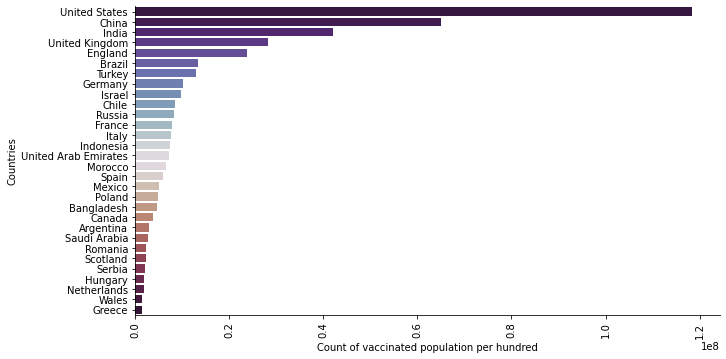

In [39]:
#Visualization1
#Get top 10 countries have vaccinated 
cols = ['country', 'total_vaccinations']
vacc_data10 = data[cols].groupby('country').max().sort_values('total_vaccinations', ascending=False)
vacc_data10=vacc_data30[:10].reset_index()

sns.catplot( x='total_vaccinations',  y=vacc_data30.country ,data=vacc_data30,kind='bar',ci=None,palette='twilight_shifted', legend_out=False,aspect=2, orient='h')
plt.xlabel('Count of vaccinated population per hundred')
plt.ylabel('Countries')
plt.xticks(rotation=90)
plt.show()

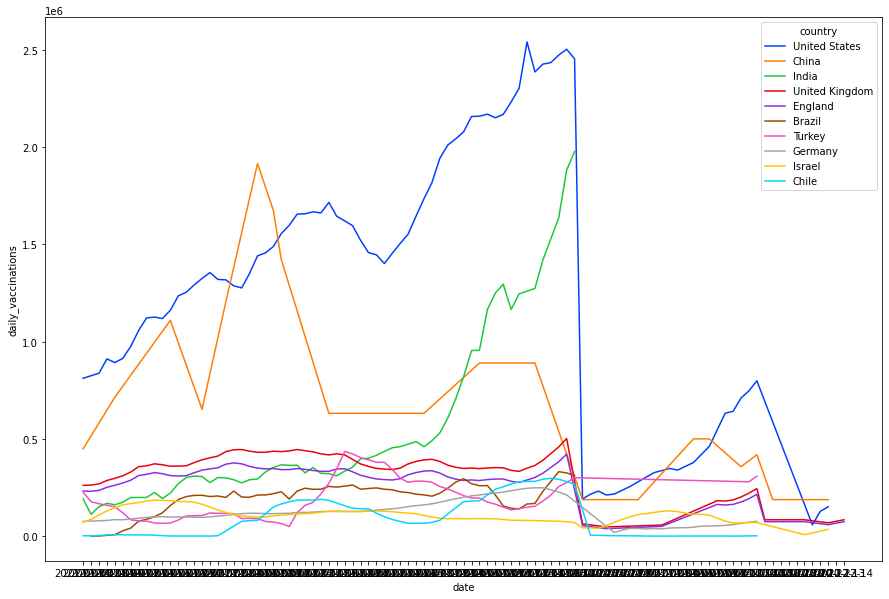

In [59]:
 # visualization2
 # get top 10 countries daily_vaccinations from data set
data.dropna()
country=vacc_data10.country  
popular_vac = data[data['country'].isin(country)]
plt.figure(figsize=(15,10))
sns.lineplot(x="date", y="daily_vaccinations",data=popular_vac,ci=0,hue='country',
             palette='bright',hue_order=country ,estimator='sum')

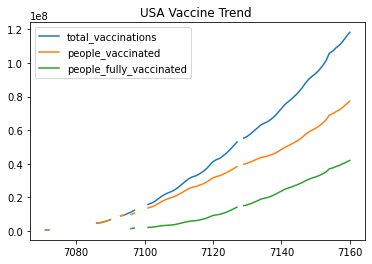

In [47]:
# data visualtzation3
# Get USA vaccine trend
required_columns = ['country', 'date', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'vaccines']

USA_vaccine_data = data.loc[data['country']=="United States",required_columns]
USA_vaccine_data.dropna()
USA_vaccine_data.plot(title = "USA Vaccine Trend ")


Text(0, 0.5, 'values')

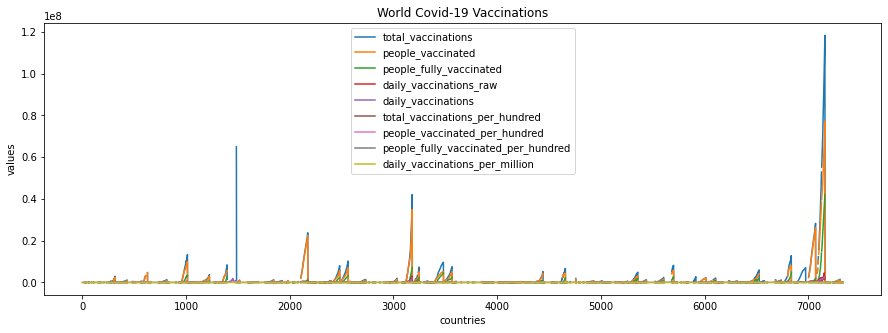

In [36]:
# data visualtzation4
# get countries vaccine trend in the world
x = data['total_vaccinations']
y = data['people_vaccinated']
ax = data.plot(figsize = (15,5),title = "World Covid-19 Vaccinations")
ax.set_xlabel('countries')
ax.set_ylabel('values')